In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [2]:
tickers={
    'Amazon':'AMZN',
    'Apple':'AAPL',
    'Facebook':'FB',
    'Google':'GOOGL',
    'Microsoft':'MSFT',
    'Tesla':'TSLA',
}

In [3]:
def getData(company):
    df1 = pd.read_csv(f'./TextAnalysis/{company}_anx.csv',
                     usecols=['Date','Anxiety Score','Negativity Score','Positivity Score'],
                     index_col='Date')
    df1.index=df1.index.astype('datetime64[ns]')

    df2=yf.Ticker(tickers[company]).history(start='2019-01-01',end='2021-12-31',interval='1d')
    df2=df2[['Close','Volume']]
    df2['Next Day Close']=df2['Close'].shift(periods=-1)
    df2['Next Day Volume']=df2['Volume'].shift(periods=-1)
    
    df=pd.merge(df2,df1,on='Date',how='inner')

    return df

In [4]:
def getPlots(df,company):
    x=df.index    
    y1_close=df['Close']
    y1_closeND=df['Next Day Close']
    y1_vol=df['Volume']
    y1_volND=df['Next Day Volume']
    
    y2_anx=df['Anxiety Score']
    y2_neg=df['Negativity Score']
    y2_pos=df['Positivity Score']

    fig,ax1 = plt.subplots(figsize=(16,8))
    
    ax1.set_title(f'{company} Article NYT Comment Sentiment vs {tickers[company]} Price (2019-2021)')
    ax1.set_xlabel('Date')

    ax1.set_ylabel('Closing Price')

    ax1.plot(x,y1_close,'r',label='Closing Price')
    ax1.plot(x,y1_closeND,'g',label='Next Day Closing Price')
    ax2 = ax1.twinx()
    
    ax2.plot(x,y2_anx,'blue',linestyle='dotted',label='Anxiety Score')
    ax2.plot(x,y2_neg,'purple',linestyle='dotted',label='Negativity Score')
    ax2.plot(x,y2_pos,'darkorange',linestyle='dotted',label='Positivity Score')
    ax2.set_ylabel('Anxiety Score')

    ax1.legend(loc='upper right')
    ax2.legend(loc='upper left')

    
    
    fig,ax1 = plt.subplots(figsize=(16,8))
    
    ax1.set_title(f'{company} Article NYT Comment Sentiment vs {tickers[company]} Volume (2019-2021)')
    ax1.set_xlabel('Date')

    ax1.set_ylabel('Volume')

    ax1.plot(x,y1_vol,'r',label='Volume')
    ax1.plot(x,y1_volND,'g',label='Next Day Volume')
    ax2 = ax1.twinx()
    
    ax2.plot(x,y2_anx,'blue',linestyle='dotted',label='Anxiety Score')
    ax2.plot(x,y2_neg,'purple',linestyle='dotted',label='Negativity Score')
    ax2.plot(x,y2_pos,'darkorange',linestyle='dotted',label='Positivity Score')
    
    ax2.set_ylabel('Anxiety Score')

    ax1.legend(loc='upper right')
    ax2.legend(loc='upper left')
    
    plt.figure(figsize=(8,8))
    sns.heatmap(df.corr(method='spearman'),annot=True,cmap='coolwarm',center=0,vmin=-1,vmax=1,square=True)
    
    plt.show()

In [5]:
df1=getData('Amazon')
df2=getData('Apple')
df3=getData('Facebook')
df4=getData('Google')
df5=getData('Microsoft')
df6=getData('Tesla')

## Amazon

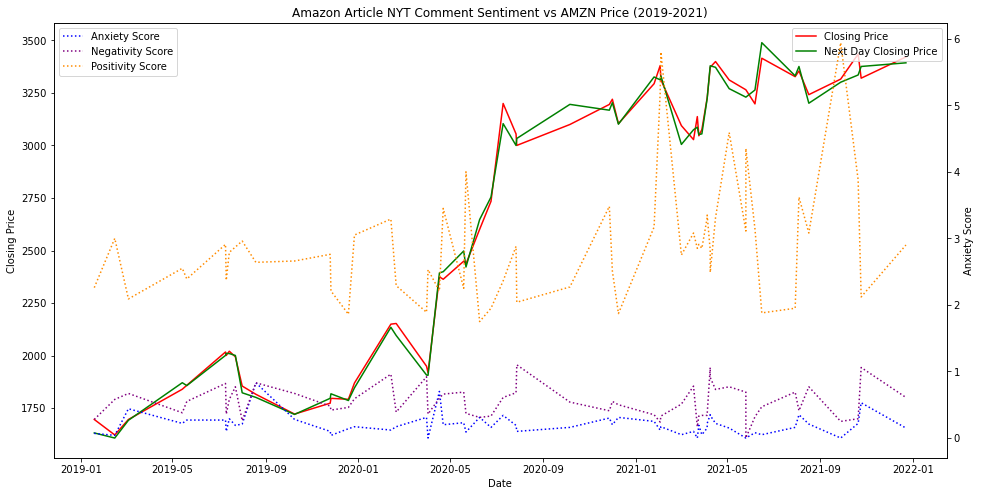

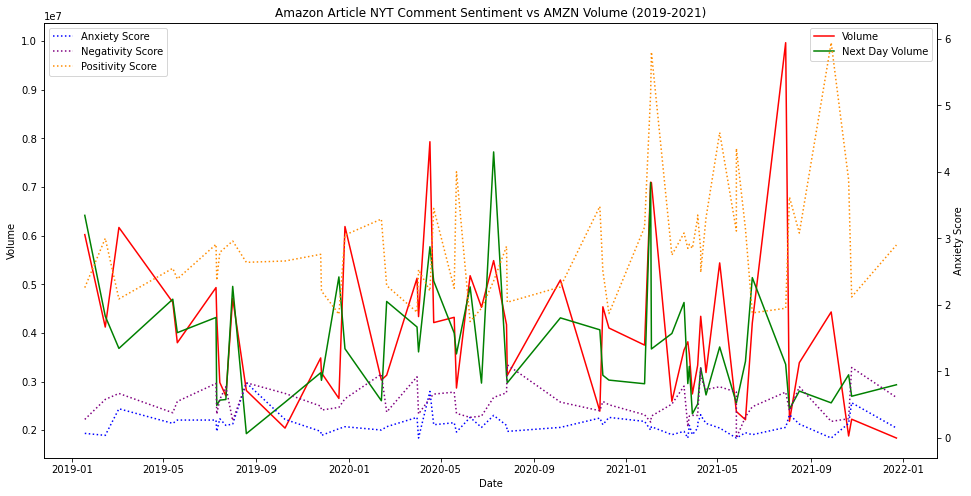

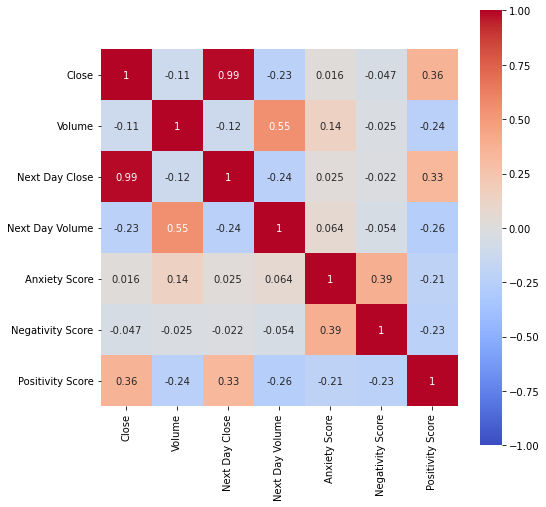

In [6]:
getPlots(df1,'Amazon')

In [7]:
df1

,Close,Volume,Next Day Close,Next Day Volume,Anxiety Score,Negativity Score,Positivity Score
Date,,,,,,,
2019-01-18,1696.199951,6020500,1632.170044,6416800.0,0.07,0.28,2.26
2019-02-14,1622.650024,4120500,1607.949951,4343900.0,0.04,0.58,3.00
2019-03-04,1696.170044,6167400,1692.430054,3681500.0,0.44,0.67,2.09
2019-05-14,1840.119995,4629100,1871.150024,4692600.0,0.22,0.38,2.55
2019-05-20,1858.969971,3798200,1857.520020,4005100.0,0.27,0.55,2.39
2019-07-10,2017.410034,4931900,2001.069946,4317800.0,0.27,0.82,2.91
2019-07-11,2001.069946,4317800,2011.000000,2509300.0,0.10,0.36,2.37
2019-07-15,2020.989990,2981300,2009.900024,2618200.0,0.29,0.58,2.79
2019-07-23,1994.489990,2703500,2000.810059,2631300.0,0.19,0.77,2.87


## Apple

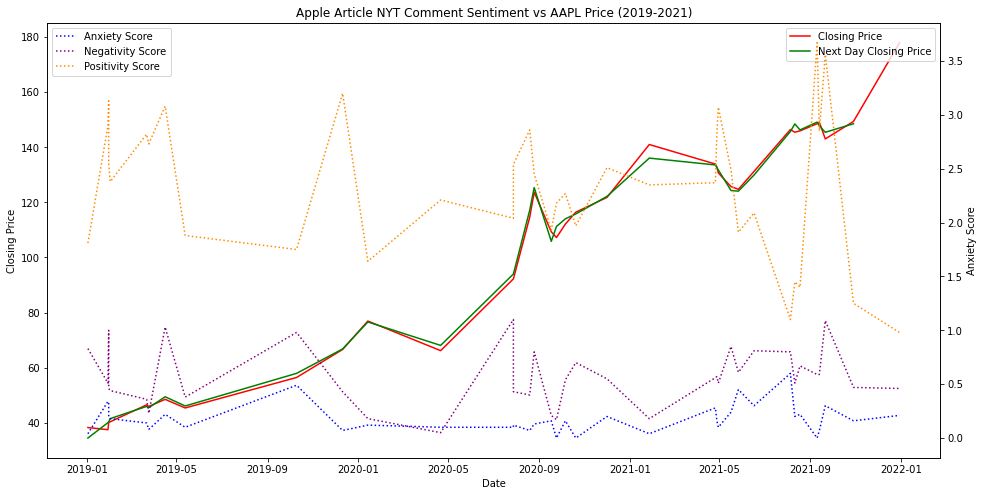

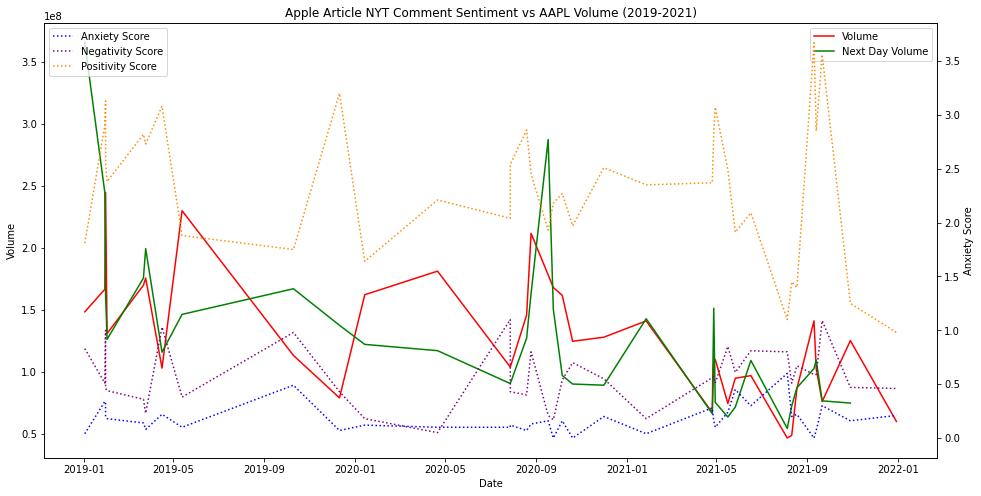

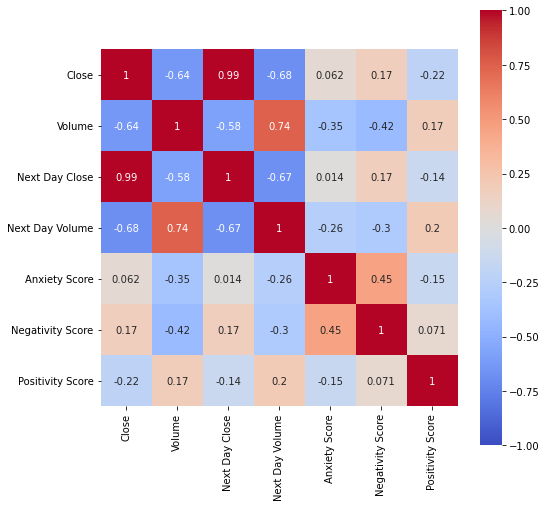

In [8]:
getPlots(df2,'Apple')

In [9]:
df2

,Close,Volume,Next Day Close,Next Day Volume,Anxiety Score,Negativity Score,Positivity Score
Date,,,,,,,
2019-01-02,38.277527,148158800,34.464798,365248800.0,0.04,0.83,1.81
2019-01-29,37.492199,166348800,40.054211,244439200.0,0.34,0.51,2.90
2019-01-30,40.054211,244439200,40.342655,162958400.0,0.33,1.00,3.13
2019-01-30,40.054211,244439200,40.342655,162958400.0,0.20,0.46,2.55
2019-02-01,40.362045,130672400,41.508518,125982000.0,0.18,0.44,2.38
2019-03-22,46.506359,169630800,45.944057,175381200.0,0.14,0.36,2.82
2019-03-25,45.944057,175381200,45.469364,199202000.0,0.08,0.23,2.73
2019-04-16,48.502449,102785600,49.446941,115627200.0,0.22,1.03,3.08
2019-05-13,45.382999,229722400,46.101433,146118800.0,0.10,0.38,1.88


## Facebook

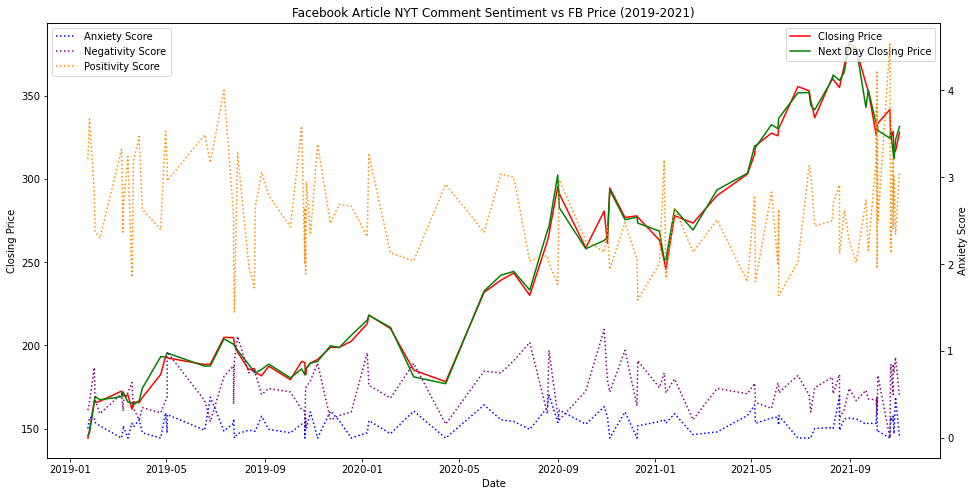

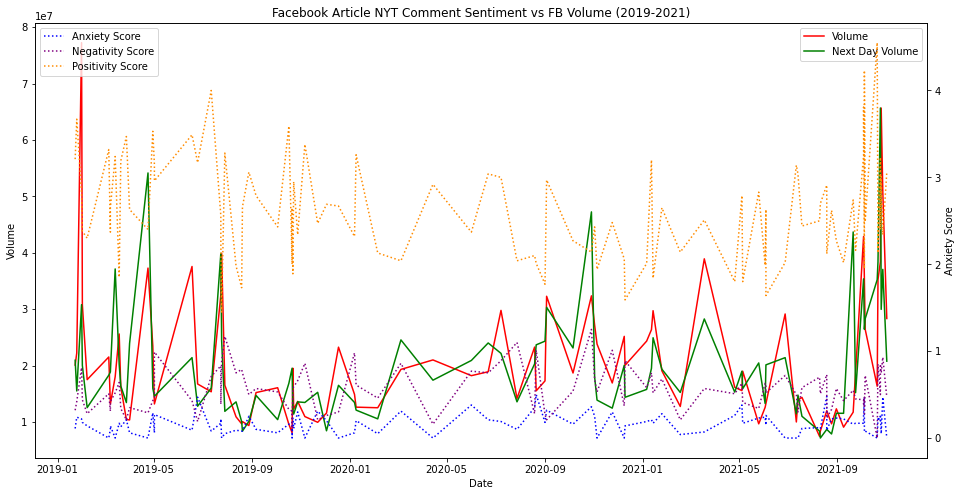

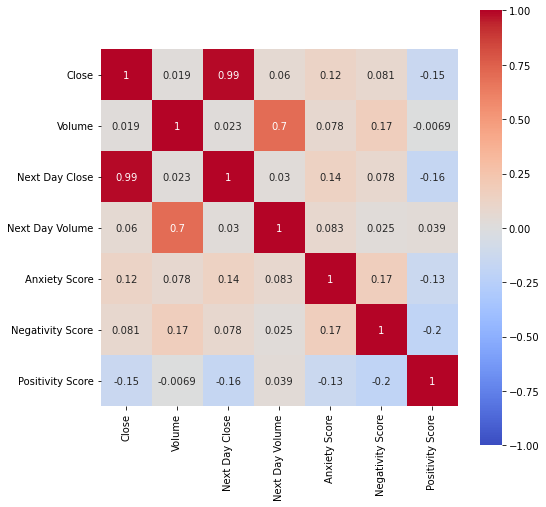

In [10]:
getPlots(df3,'Facebook')

In [11]:
df3

,Close,Volume,Next Day Close,Next Day Volume,Anxiety Score,Negativity Score,Positivity Score
Date,,,,,,,
2019-01-23,144.300003,20098400,145.830002,20955500.0,0.11,0.32,3.21
2019-01-25,149.009995,22237200,147.470001,15508500.0,0.24,0.42,3.67
2019-01-31,166.690002,77233600,165.710007,30806500.0,0.22,0.81,2.81
2019-02-01,165.710007,30806500,169.250000,20036000.0,0.18,0.44,2.38
2019-02-07,166.380005,17517600,167.330002,12561400.0,0.14,0.28,2.30
...,...,...,...,...,...,...,...
2021-10-25,328.690002,38409000,315.809998,65654000.0,0.19,0.50,3.23
2021-10-25,328.690002,38409000,315.809998,65654000.0,0.27,0.85,2.40
2021-10-26,315.809998,65654000,312.220001,29971800.0,0.05,0.75,3.01


## Google

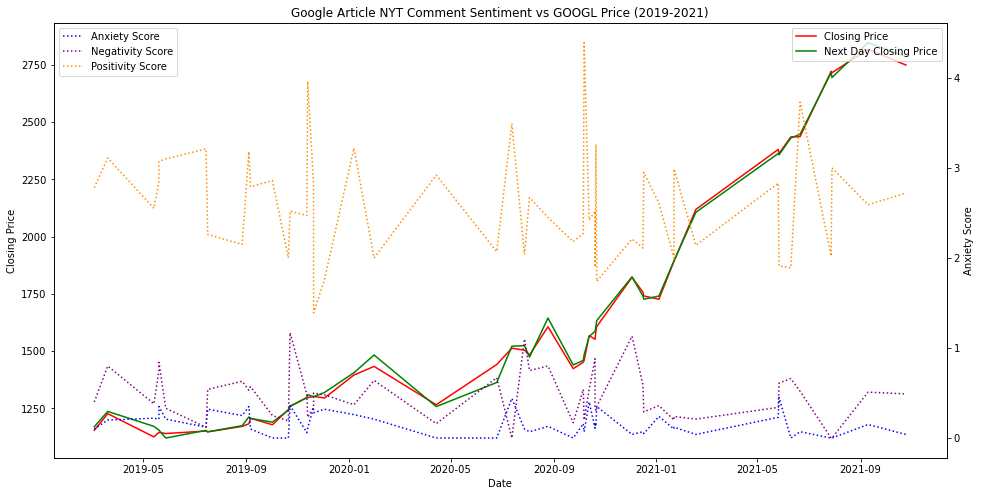

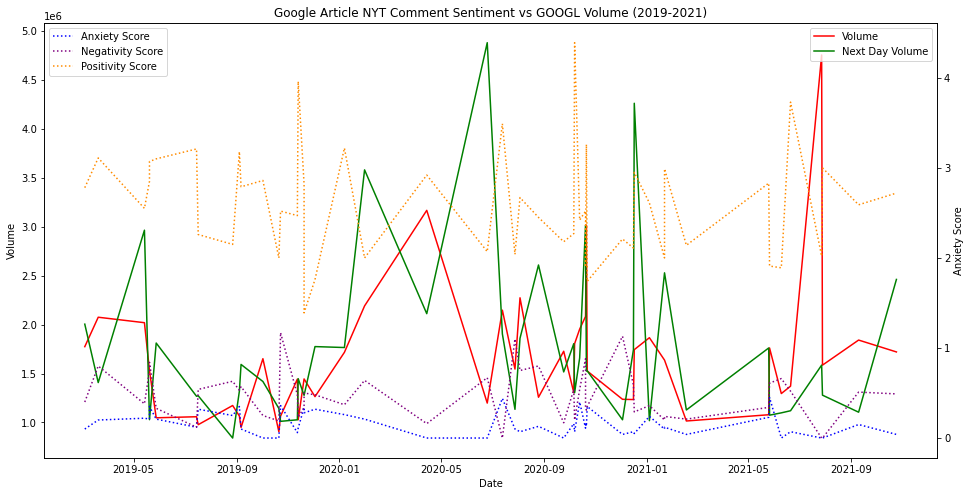

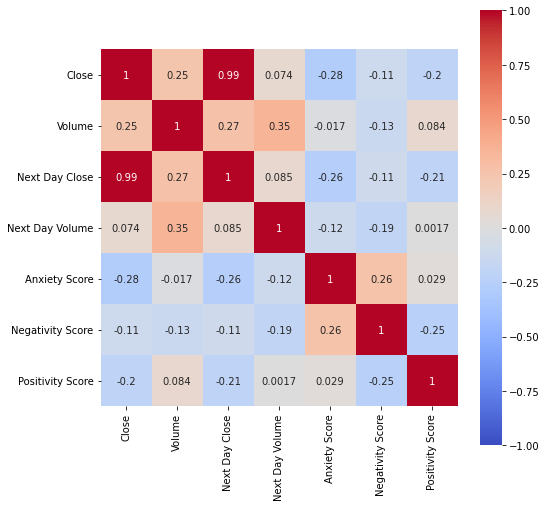

In [12]:
getPlots(df4,'Google')

In [13]:
df4

,Close,Volume,Next Day Close,Next Day Volume,Anxiety Score,Negativity Score,Positivity Score
Date,,,,,,,
2019-03-04,1153.420044,1774500,1169.189941,2004700.0,0.10,0.40,2.78
2019-03-20,1226.430054,2075400,1236.130005,1407500.0,0.20,0.80,3.11
2019-05-14,1124.859985,2019600,1170.800049,2965100.0,0.22,0.38,2.55
2019-05-20,1144.660034,1530100,1154.439941,1028100.0,0.21,0.75,2.85
2019-05-20,1144.660034,1530100,1154.439941,1028100.0,0.35,0.84,3.07
2019-05-28,1139.560059,1047400,1119.939941,1811500.0,0.21,0.33,3.10
2019-07-15,1150.510010,1058200,1153.459961,1267600.0,0.12,0.12,3.21
2019-07-17,1146.739990,976900,1147.239990,1272500.0,0.32,0.54,2.26
2019-08-27,1170.819946,1173000,1173.750000,840500.0,0.25,0.63,2.15


## Microsoft

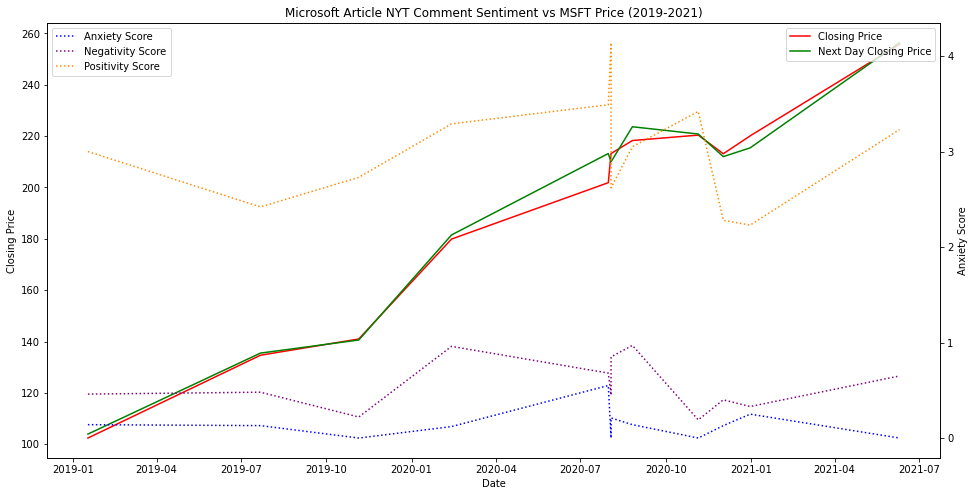

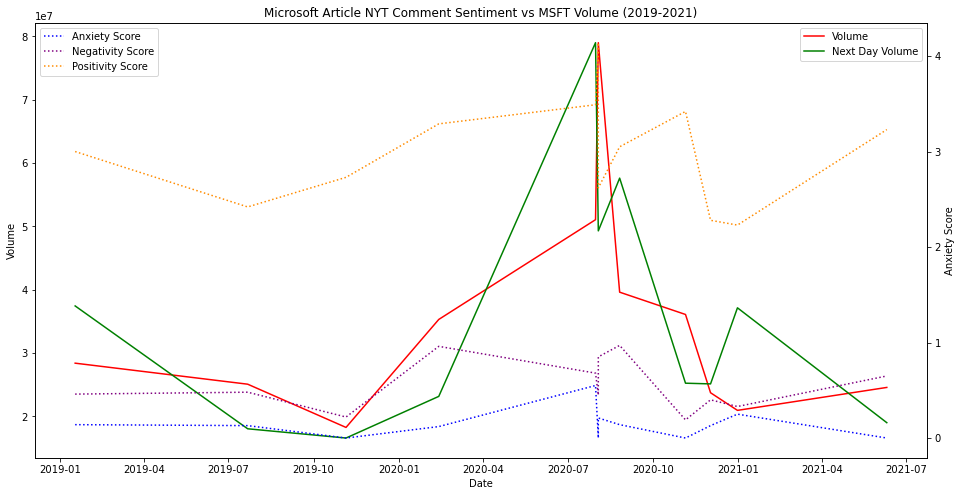

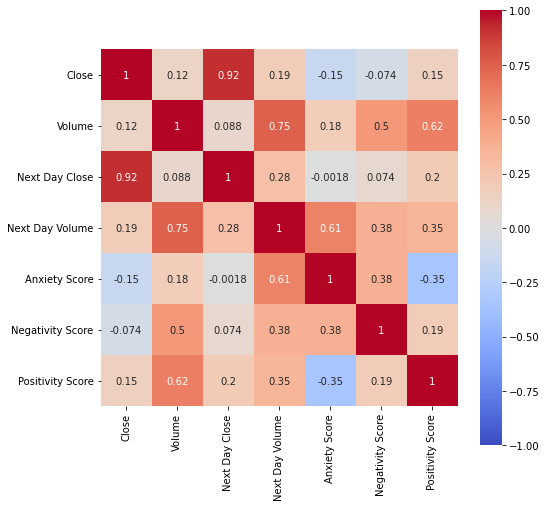

In [14]:
getPlots(df5,'Microsoft')

In [15]:
df5

,Close,Volume,Next Day Close,Next Day Volume,Anxiety Score,Negativity Score,Positivity Score
Date,,,,,,,
2019-01-17,102.405647,28393000,103.939987,37427600.0,0.14,0.46,3.00
2019-07-22,134.651825,25074900,135.488358,18034600.0,0.13,0.48,2.42
2019-11-05,140.985199,18250200,140.594788,16575800.0,0.00,0.22,2.73
2020-02-13,179.901184,35295800,181.507156,23149500.0,0.12,0.96,3.29
2020-07-31,201.868546,51044000,213.221863,78983000.0,0.55,0.68,3.49
2020-08-03,213.221863,78983000,210.021667,49280100.0,0.00,0.45,4.14
2020-08-03,213.221863,78983000,210.021667,49280100.0,0.21,0.85,2.62
2020-08-26,218.287628,39600800,223.647354,57602200.0,0.14,0.97,3.05
2020-11-05,220.399918,36080100,220.824371,25231900.0,0.00,0.19,3.42


## Tesla

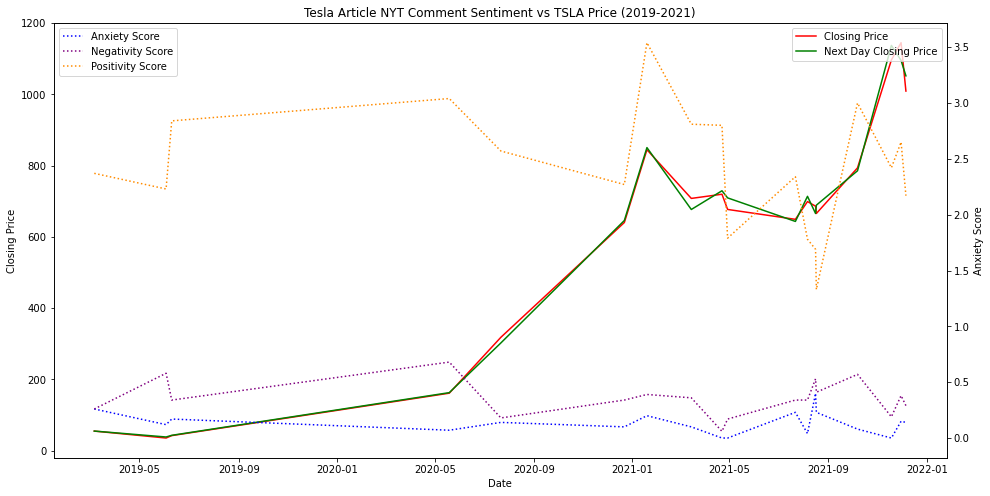

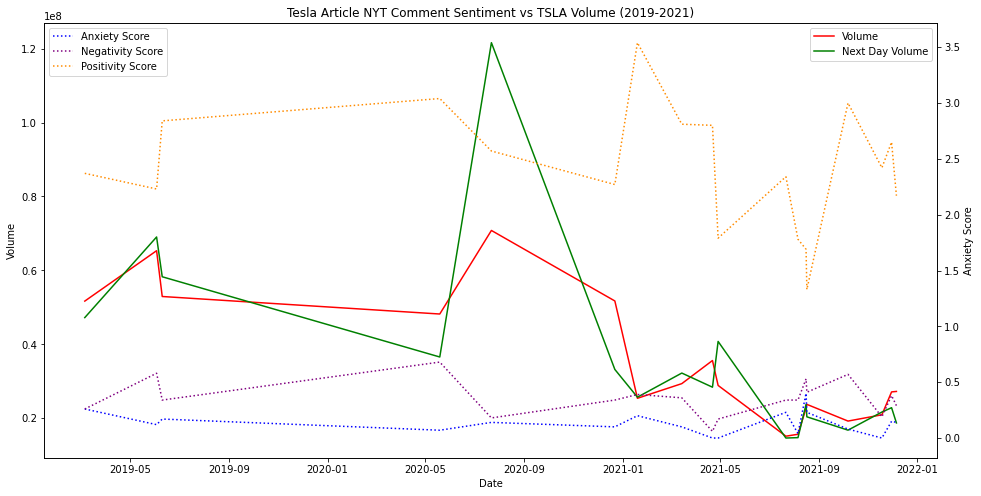

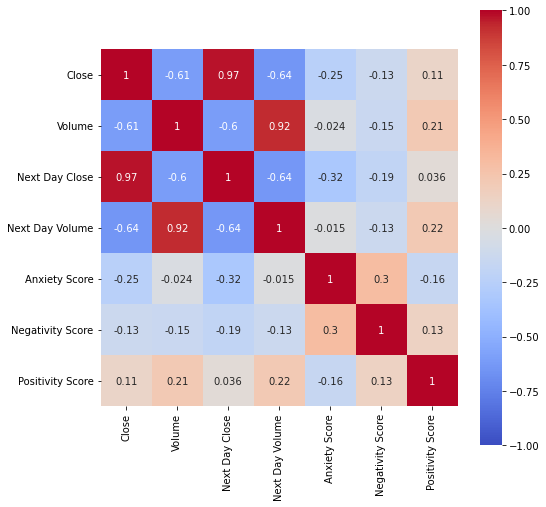

In [16]:
getPlots(df6,'Tesla')

In [17]:
df6

,Close,Volume,Next Day Close,Next Day Volume,Anxiety Score,Negativity Score,Positivity Score
Date,,,,,,,
2019-03-06,55.248001,51677500,55.318001,47212500.0,0.26,0.26,2.37
2019-06-03,35.793999,65322000,38.720001,69037500.0,0.12,0.58,2.23
2019-06-10,42.576000,52925000,43.419998,58267500.0,0.17,0.34,2.84
2020-05-19,161.602005,48182500,163.112000,36546500.0,0.07,0.68,3.04
2020-07-22,318.466003,70805500,302.614014,121642500.0,0.14,0.18,2.57
2020-12-22,640.340027,51716000,645.979980,33173000.0,0.10,0.34,2.27
2021-01-19,844.549988,25367000,850.450012,25665900.0,0.20,0.39,3.54
2021-03-15,707.940002,29335600,676.880005,32195700.0,0.10,0.36,2.81
2021-04-22,719.690002,35590300,729.400024,28370000.0,0.00,0.06,2.80
